In [1]:
import numpy as np
import matplotlib.pyplot as plt


def plot_multiple_losses(losses, same_scale=True):
    loss_fns = losses.values()
    loss_names = losses.keys()
    # Set up a grid of values for x_pred and x_true in the range [-0.5, 1.5]^2
    x_true_vals = np.linspace(-0.5, 1.5, 100)
    x_pred_vals = np.linspace(-0.5, 1.5, 100)
    X_true, X_pred = np.meshgrid(x_true_vals, x_pred_vals)
    
    # If no names are provided, use a default naming scheme
    if loss_names is None:
        loss_names = [f'Loss Function {i+1}' for i in range(len(loss_fns))]

    # Compute the loss for each loss function across the grid
    loss_vals_list = [loss_fn(X_true, X_pred) for loss_fn in loss_fns]
    
    # Determine the layout for subplots
    n = len(loss_fns)
    cols = 3  # Two plots per row
    rows = (n + cols - 1) // cols  # Calculate number of rows needed

    # Determine global min and max for same scale if necessary
    if same_scale:
        global_min = min(np.min(loss_vals) for loss_vals in loss_vals_list)
        global_max = max(np.max(loss_vals) for loss_vals in loss_vals_list)
    
    # Create subplots for each loss function
    plt.figure(figsize=(12, 3 * rows))  # Adjust figure size dynamically

    for i, (loss_vals, loss_name) in enumerate(zip(loss_vals_list, loss_names), 1):
        plt.subplot(rows, cols, i)

        # Define color range based on the chosen scale setting
        if same_scale:
            plt.contourf(X_true, X_pred, loss_vals, levels=50, cmap="viridis", vmin=global_min, vmax=global_max)
        else:
            plt.contourf(X_true, X_pred, loss_vals, levels=50, cmap="viridis")

        plt.colorbar(label='Loss Value')
        plt.title(f"Heatmap of {loss_name}")
        plt.xlabel('True Value (x_true)')
        plt.ylabel('Predicted Value (x_pred)')

    plt.tight_layout()
    plt.show()


In [2]:
# Define the arbitrary loss function (as an example, using absolute error)
def mae(x_true, x_pred):
    return np.abs(x_true - x_pred)
def mse(x_true, x_pred):
    return np.abs(x_true - x_pred)**2
def msle(x_true, x_pred):
    return np.abs(np.log(1+x_true) - np.log(1+x_pred))**2
def rmsle(x_true, x_pred):
    return np.sqrt(np.abs(np.log(1+x_true) - np.log(1+x_pred))**2)
def male(x_true, x_pred):
    return np.abs(np.log(1+x_true) - np.log(1+x_pred))

def pos(x_true,x_pred):
    x_true = np.log(1+np.exp(x_true))
    x_pred = np.log(1+np.exp(x_pred))
    return x_true,x_pred
def maple(x_true,x_pred):
    x_true,x_pred = pos(x_true,x_pred)
    return np.abs((x_true - x_pred)/x_true)
def mspe(x_true, x_pred):
    return np.abs((x_true - x_pred)/x_true)**2
def create_pos_loss(loss_fn):
    return lambda x_true, x_pred: loss_fn(*pos(x_true, x_pred))
def abslogloss(x_true, x_pred):
    x_pred = np.sign(x_pred)*np.log(1+np.abs(x_pred))
    x_true = np.sign(x_true)*np.log(1+np.abs(x_true))
    return np.abs(x_true - x_pred)
def abstanhlogloss(x_true, x_pred):
    x_pred = np.tanh(x_pred)*np.log(1+np.abs(x_pred))
    x_true = np.tanh(x_true)*np.log(1+np.abs(x_true))
    return np.abs(x_true - x_pred)
def stanhlogloss(x_true, x_pred):
    x_pred = np.tanh(x_pred)*np.log(1+np.abs(x_pred))
    x_true = np.tanh(x_true)*np.log(1+np.abs(x_true))
    return np.abs(x_true - x_pred)**2
def slogloss(x_true, x_pred):
    x_pred = np.sign(x_pred)*np.log(1+np.abs(x_pred))
    x_true = np.sign(x_true)*np.log(1+np.abs(x_true))
    return np.abs(x_true - x_pred)**2


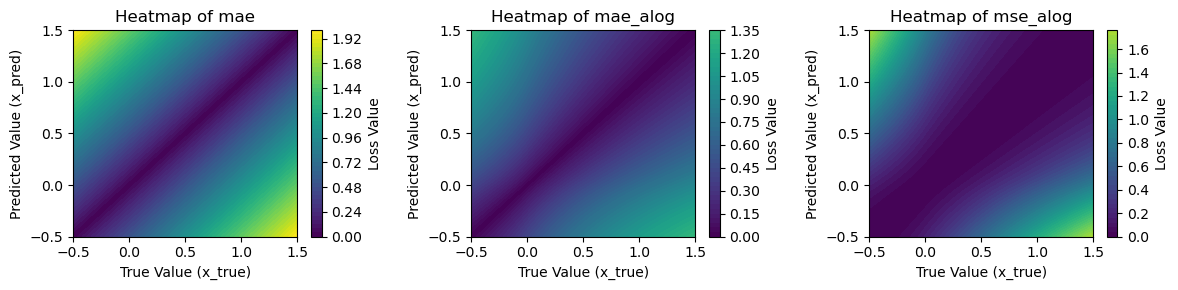

In [7]:
losses = {
    "mae": mae,
    "mae_alog":abslogloss,
    "mse_alog":slogloss,
    #"mse":mse,
    #"male": male,
    #"pos_mae": create_pos_loss(mae),
    #"mse": mse,
    #"msle": msle,
    #"pos_msle": create_pos_loss(msle),
    #"abslogloss": abslogloss,
    #"slogloss": slogloss,
    #"abstanhlogloss": abstanhlogloss,
    #"stanhlogloss": stanhlogloss,
    #"pos_mse": create_pos_loss(mse),
    #"mape": mape,
    #"pos_mspe": create_pos_loss(mspe),
    #"pos_mape": create_pos_loss(mape)
}
plot_multiple_losses(losses, same_scale=True)